In [30]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

class WalkingTrot():
    """
  trotting gait
  @author: HonboZhu, BoxiXia
  """
    def __init__(self,
                 phase_offset=0,
                 stance_ratio=0.6,
                 stance_start_angle=np.pi / 4,
                 stance_end_angle=3 * np.pi / 4):
        assert (stance_end_angle > stance_start_angle)
        self.phase_offset = phase_offset
        self.stance_ratio = stance_ratio
        self.stance_start_angle = stance_start_angle
        self.stance_end_angle = stance_end_angle
        
        
        self.contact_angle = self.stance_end_angle - self.stance_start_angle
        


    def GetPos(self, phase):
        """
    return the position [0,2pi] given the current phase
    """
        
        vel_air = (2 * np.pi - self.contact_angle) / (1 - self.stance_ratio)
        vel_stance = self.contact_angle / self.stance_ratio # ground contact velocity (normalized)
        
        phase = phase%1.0
        if (phase < 0):
            phase += 1

        if (phase >= 0 and phase < self.stance_start_angle / vel_air):
            desire_angle = vel_air * phase

        elif (phase >= self.stance_start_angle / vel_air and
              phase < self.stance_start_angle / vel_air + self.stance_ratio):
            desire_angle = self.stance_start_angle + vel_stance * (
                phase - self.stance_start_angle / vel_air)

        else:
            desire_angle = vel_air * phase + 2 * np.pi - vel_air
        return desire_angle
    
    def GetVel(self,phase): 
        vel_air = (2 * np.pi - self.contact_angle) / (1 - self.stance_ratio)
        vel_stance = self.contact_angle / self.stance_ratio
        phase = phase%1.0
        if (phase < 0):
            phase += 1
            
        if (phase >= 0 and phase < self.stance_start_angle / vel_air):
            vel = vel_air

        elif (phase >= self.stance_start_angle / vel_air and
              phase < self.stance_start_angle / vel_air + self.stance_ratio):
            vel = vel_stance

        else:
            vel = vel_air
        return vel
    
trot = WalkingTrot()
phase_arr = np.linspace(0,1,1000)
angle1 = np.array([trot.GetPos(phase) for phase in phase_arr])
angle2 = np.array([trot.GetPos(phase+0.5) for phase in phase_arr])
angle3 = 2*np.pi-angle1
angle4 = 2*np.pi-angle2
motor_pos = np.stack((angle1,angle2,angle3,angle4),axis=1)

vel1 = np.array([trot.GetVel(phase) for phase in phase_arr])
vel2 = np.array([trot.GetVel(phase+0.5) for phase in phase_arr])
vel3= -vel1
vel4= -vel2
motor_vel = np.stack((vel1,vel2,vel3,vel4),axis=1)

##If moving forward:

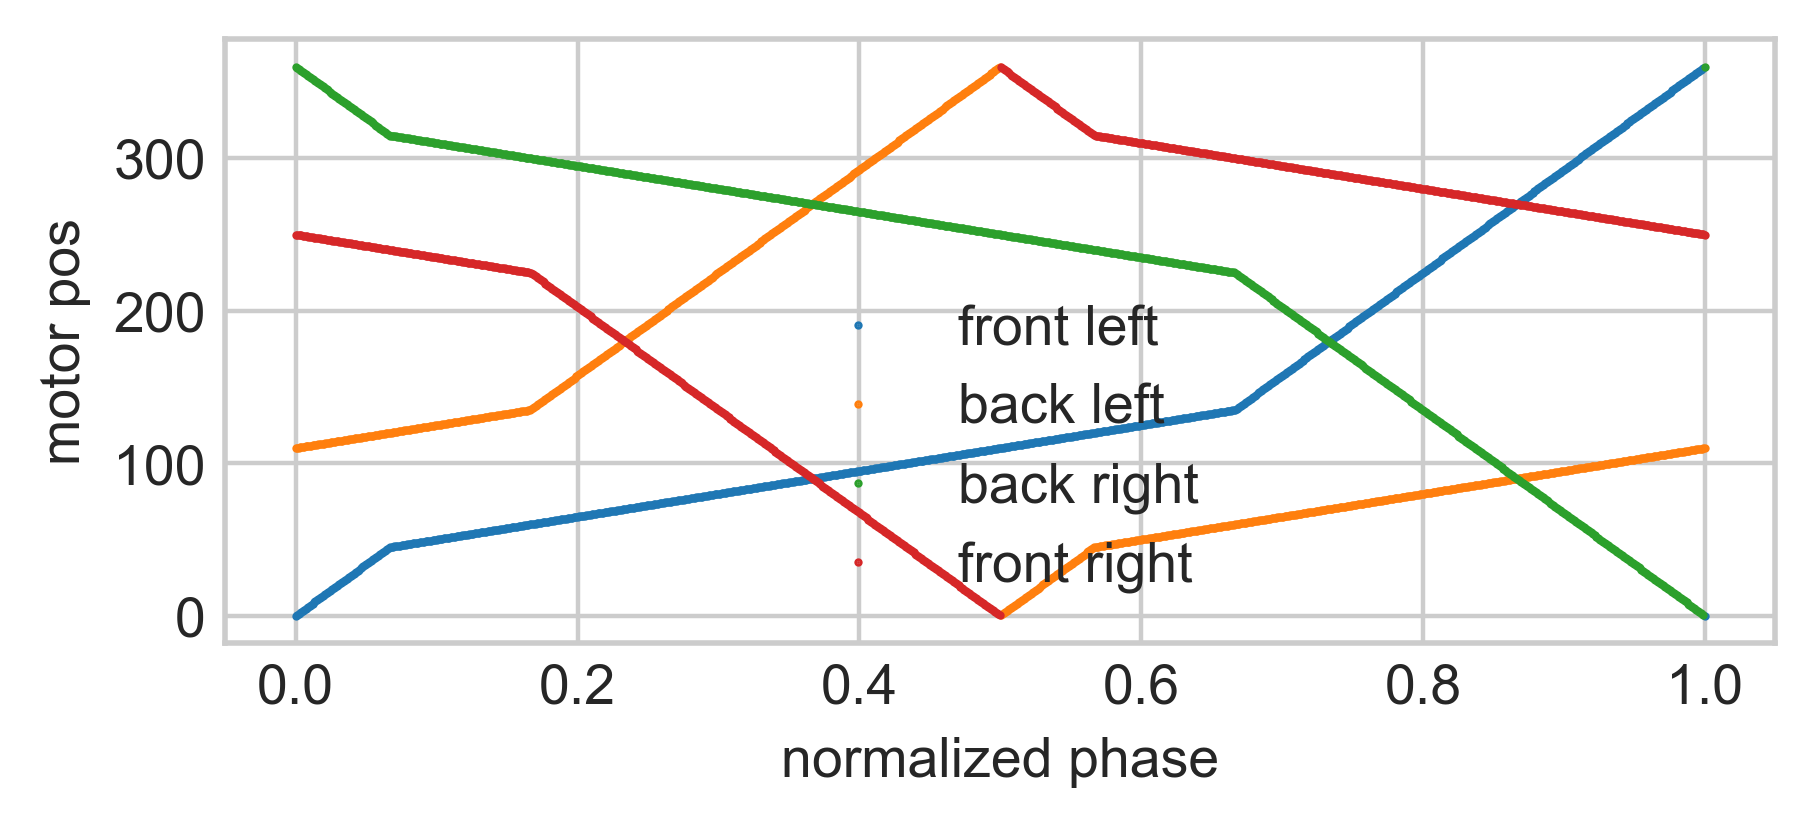

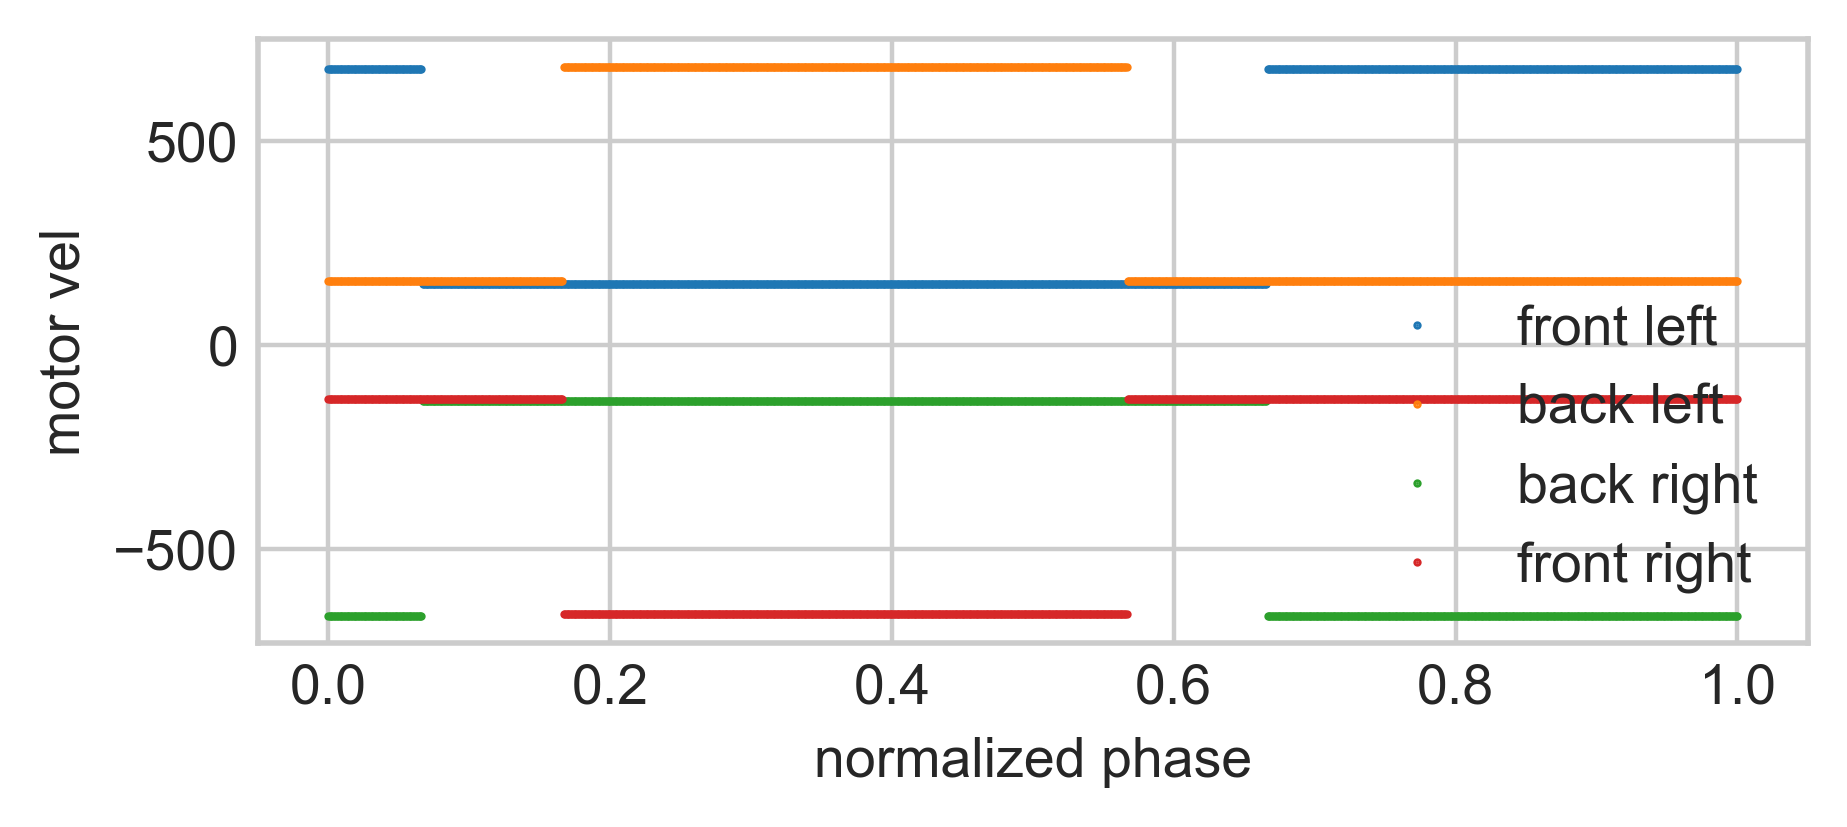

In [29]:
plt.figure(figsize=(5,2),dpi=200)
plt.plot(phase_arr,np.rad2deg(angle1),'.',label='front left',markersize=1)
plt.plot(phase_arr,np.rad2deg(angle2),'.',label='back left',markersize=1)
plt.plot(phase_arr,np.rad2deg(angle3),'.',label='back right',markersize=1)
plt.plot(phase_arr,np.rad2deg(angle4),'.',label='front right',markersize=1)
plt.ylabel("motor pos")
plt.xlabel("normalized phase")
plt.legend()
plt.show()
plt.figure(figsize=(5,2),dpi=200)
plt.plot(phase_arr,np.rad2deg(vel1),'.',label='front left',markersize=1)
plt.plot(phase_arr,np.rad2deg(vel2+0.1),'.',label='back left',markersize=1)
plt.plot(phase_arr,np.rad2deg(vel3+0.2),'.',label='back right',markersize=1)
plt.plot(phase_arr,np.rad2deg(vel4+0.3),'.',label='front right',markersize=1)
plt.ylabel("motor vel")
plt.xlabel("normalized phase")
plt.legend()
plt.show()